---
# KNN (k-Nearest-Neighbour)
## Ist ein Lazy-Learning Algorithmus = Modellbildung erfolgt nicht aus Lernen der Trainingsdaten, sondern es werden einfach die Trainingsbeispiele einfach gespeichert
<br>
## [1. parametrisierte Modelle] - Schätzung der Parameter anhand der Trainingsdaten, um eine Diskriminanzfunktion herzuleiten, die NEUE DATEN klassifizieren kann, ohne auf die ursprünglichen Trainingsdaten zurückzugreifen
Beispiele: Perzeptron, logistische Regression und lineare SVM<br>
<br>
## [2. NICHT-parametrisierte Modelle] - nicht durch festen Ansatz von Parametern beschreibbar - die Anzahl der Parameter nicht mit den Trainingsdaten zu
Beispiele: Random Forest und Kernel-SVM<br>
KNN wäre eine Untergruppe und wird als instanzbasiertes Lernen bezeichnet, Lernen ist mit keinerlei Aufwand verbunden

## BESCHREIBUNG
Punkte werden anhand der nächstliegenden k-Punkte und einem Abstandsmaß klassifiziert nach den Trainingsdatenpunkten, die hier am ähnlichsten sind<br>
Die Klassenifizierung (Klassenbezeichnung) erfolgt dann durch Mehrheitsentscheidung.<br>
<br>
`VORTEIL:` der Klassifikator passt sich sofort an, wenn neue Daten hereinkommen<br>
`NACHTEIL:` Wir können keine Trainingsdaten verwerfen, weil es keine gibt und der Rechenaufwand kann zum Problem mit sehr großen Datensätzen werden

---
# 1. IMPORT

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

---
# 2. DATA PREPARATION

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
print("Shape von X: ", X.shape)
print("Feature-Names: ", iris.feature_names)
y = iris.target
print("Shape von y: ", y.shape)
print("Names zu den Klassen: ", iris.target_names)
print("Klassenbezeichnungen als Zahlen: ", np.unique(y))
print("Shape von X/y: ", X.shape, " / ", y.shape)

Shape von X:  (150, 2)
Feature-Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape von y:  (150,)
Names zu den Klassen:  ['setosa' 'versicolor' 'virginica']
Klassenbezeichnungen als Zahlen:  [0 1 2]
Shape von X/y:  (150, 2)  /  (150,)


---
# 3. TRAIN_TEST_SPLIT

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3, stratify=y)
print("Bezeichner in y: ",     np.bincount(y))
print("Bezeichner in train: ", np.bincount(y_train))
print("Bezeichner in test: ",  np.bincount(y_test))

Bezeichner in y:  [50 50 50]
Bezeichner in train:  [35 35 35]
Bezeichner in test:  [15 15 15]


---
# 4. STANDARDIZE AND NORMALIZE DATA

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

---
# 5. TRAIN MODEL

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Parameter 
# p      = Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used
# metric = Distance metric to use for the tree.  The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')  
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

### PLOTTING FUNCTION

In [16]:
def plot_decision_regions(X :np.array, y :np.array, classifier: object, test_idx=None, resolution=.005):
    # Markierungen und Farben
    markers = ('s', 'x', 'o', 'v', '^')
    colors  = ("red", "green", "blue", "lightgreen", "cyan")
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # Plotten Entscheidungsgrenze
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(10,7), dpi=120)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Exemplare
    for idx, cl in enumerate(np.unique(y)):
        # print("Index: ", idx)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=iris.target_names[cl],
                    edgecolors='hotpink')
    
    # Exemplare der Testdatenmenge hervorheben -> wir kreisen diese Punkte explizit ein
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], 
                    X_test[:,1],
                    c='',
                    edgecolors='hotpink',
                    alpha=1.0,
                    linewidths=1, 
                    marker='o',
                    s=100,
                    label='Testdaten')


In [17]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined     = np.hstack((y_train, y_test))

---
# 6. PREDICTING MODEL AND PLOT

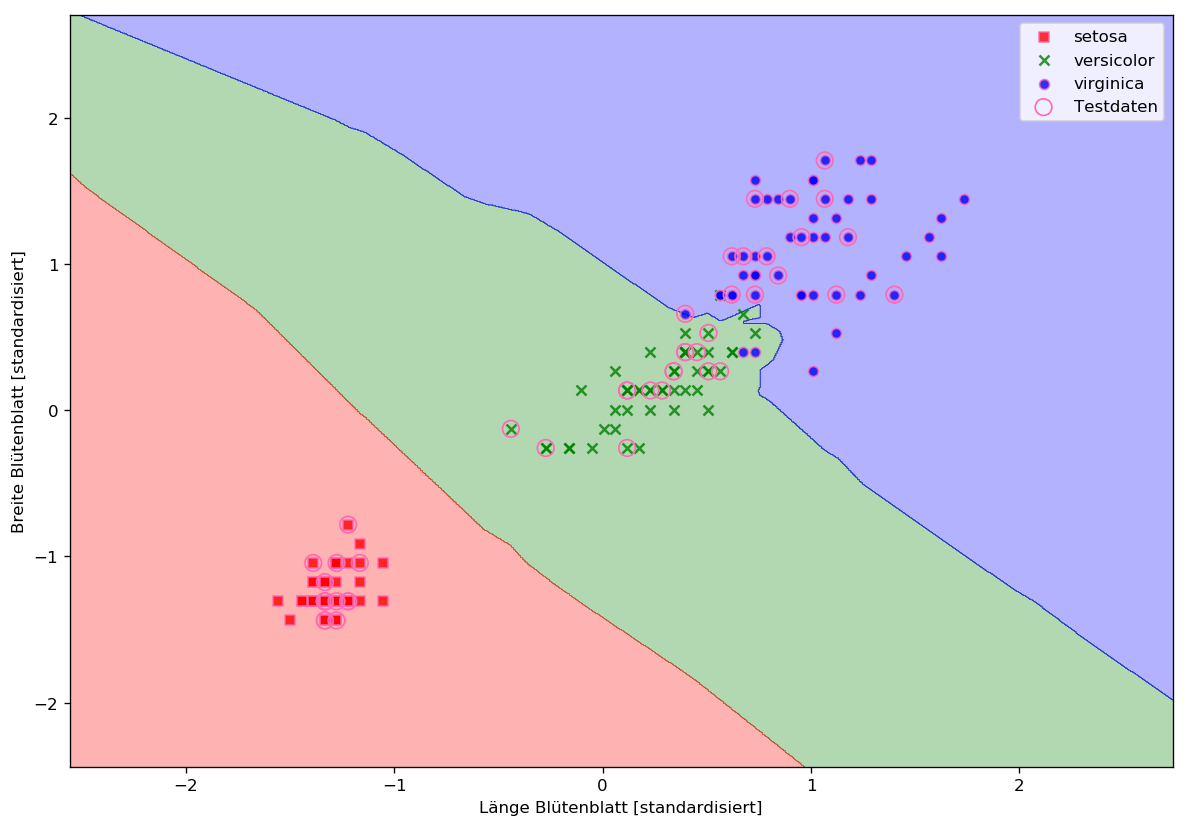

In [18]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel("Länge Blütenblatt [standardisiert]")
plt.ylabel("Breite Blütenblatt [standardisiert]")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Sollte es bei der Mehrheitsentscheidung zu einem Gleichstand kommen - gewinnen diejenigen Nachbarn, die den geringsten Abstand zum Nachbarn haben.<br>
Ist auch dieser gleich, gewinnt derjenige Nachbar, der in den Trainingsdaten zuerst erscheint!<br>
<br>
# Die richtige Wahl von "k" ist entscheident,...
um ein gutes Ergebnis zwischen Über- und Unteranpassung er erlangen! Ausserdem müssen die Daten für dieses Modell über gleiche Skalen verfügen<br>
Dieses Modell ist anfällig für Überanpassung